# 2022 NZMSA Data Science Submission.

In [2]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

%matplotlib inline

# Exploratory Data Analysis.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if __name__ == '__main__':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:17: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.


Mean: 
tmpc              15.811503
dwpc              12.115772
relh              79.782307
sknt               8.919029
gust              30.962594
peak_wind_drct          NaN
dtype: float64

Standard deviation: 
tmpc               4.235197
dwpc               3.738005
relh              12.562199
sknt               5.348379
gust               6.319510
peak_wind_drct          NaN
dtype: float64

25th percentile: 
tmpc              13.00
dwpc               9.00
relh              71.45
sknt               5.00
gust              27.00
peak_wind_drct      NaN
Name: 0.25, dtype: float64

Median: 
tmpc              16.00
dwpc              12.00
relh              81.99
sknt               8.00
gust              31.00
peak_wind_drct      NaN
dtype: float64

25th percentile: 
tmpc              19.00
dwpc              15.00
relh              88.18
sknt              12.00
gust              35.00
peak_wind_drct      NaN
Name: 0.75, dtype: float64

10th percentile: 
tmpc              11.00
dwpc         

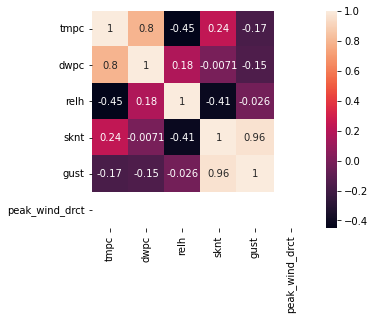

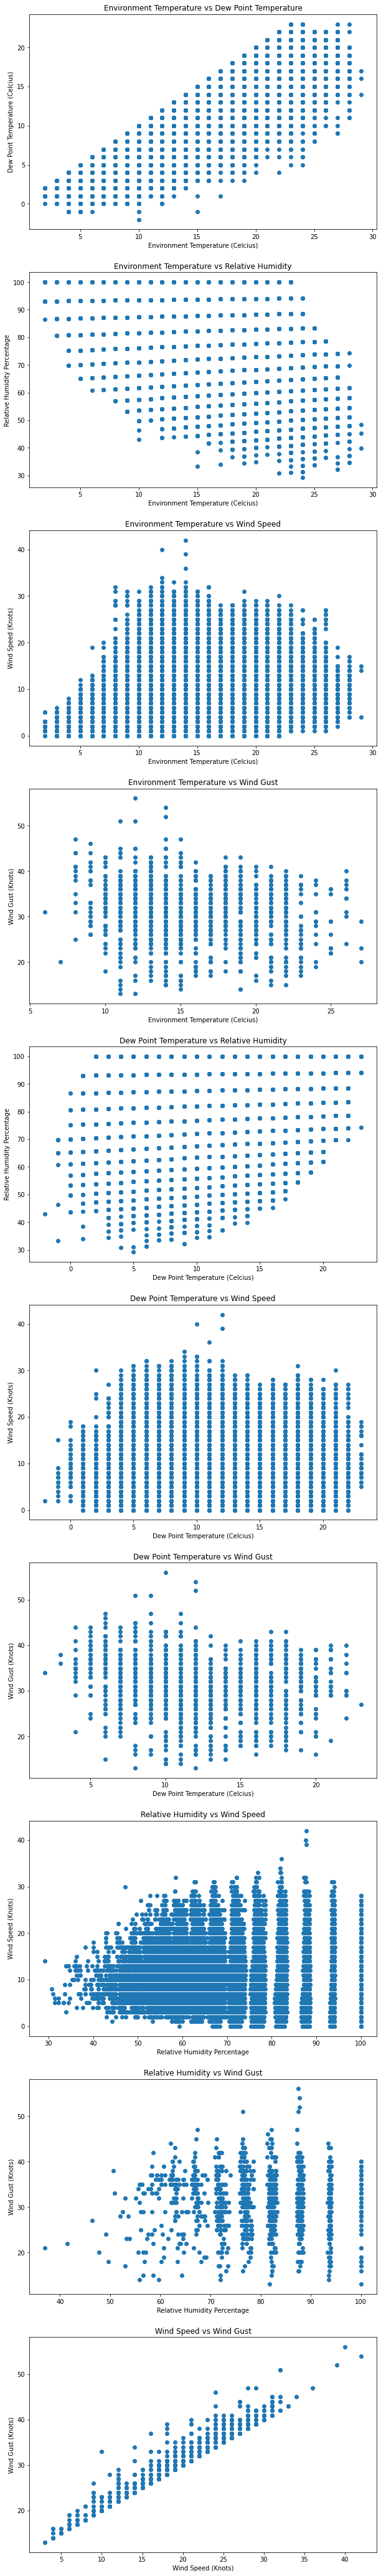

In [4]:
dataset = pd.read_csv("weather-data.csv")
dataset.head() # Show the first five results.

# Mean - Average value of the data.
mean = dataset.mean()
print(f'Mean: \n{mean}\n')

# std (Standard Deviation)
std = dataset.std()
print(f'Standard deviation: \n{std}\n')

# 25% - The 25th percentile value.
lower_quartile = dataset.quantile(0.25)
print(f'25th percentile: \n{lower_quartile}\n')

# 50% - Median.
median = dataset.median()
print(f'Median: \n{median}\n')

# 75% - The 75th percentile value.
upper_quartile = dataset.quantile(0.75)
print(f'25th percentile: \n{upper_quartile}\n')

# 10% - The 10th percentile value.
tenth_percentile = dataset.quantile(0.1)
print(f'10th percentile: \n{tenth_percentile}\n')

# 90% - The 90th percentile value.
ninetieth_quartile = dataset.quantile(0.9)
print(f'90th percentile: \n{ninetieth_quartile}\n')

# Correlation matrix heatmap
sns.heatmap(dataset.corr(), annot=True, square=True)

# Graphing plots
fig, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10) = plt.subplots(nrows=10, ncols=1, squeeze=True)

ax1.scatter(dataset['tmpc'], dataset['dwpc'])
ax1.set_title("Environment Temperature vs Dew Point Temperature")
ax1.set_xlabel("Environment Temperature (Celcius)")
ax1.set_ylabel("Dew Point Temperature (Celcius)")

ax2.scatter(dataset['tmpc'], dataset['relh'])
ax2.set_title("Environment Temperature vs Relative Humidity")
ax2.set_xlabel("Environment Temperature (Celcius)")
ax2.set_ylabel("Relative Humidity Percentage")

ax3.scatter(dataset['tmpc'], dataset['sknt'])
ax3.set_title("Environment Temperature vs Wind Speed")
ax3.set_xlabel("Environment Temperature (Celcius)")
ax3.set_ylabel("Wind Speed (Knots)")

ax4.scatter(dataset['tmpc'], dataset['gust'])
ax4.set_title("Environment Temperature vs Wind Gust")
ax4.set_xlabel("Environment Temperature (Celcius)")
ax4.set_ylabel("Wind Gust (Knots)")

ax5.scatter(dataset['dwpc'], dataset['relh'])
ax5.set_title("Dew Point Temperature vs Relative Humidity")
ax5.set_xlabel("Dew Point Temperature (Celcius)")
ax5.set_ylabel("Relative Humidity Percentage")

ax6.scatter(dataset['dwpc'], dataset['sknt'])
ax6.set_title("Dew Point Temperature vs Wind Speed")
ax6.set_xlabel("Dew Point Temperature (Celcius)")
ax6.set_ylabel("Wind Speed (Knots)")

ax7.scatter(dataset['dwpc'], dataset['gust'])
ax7.set_title("Dew Point Temperature vs Wind Gust")
ax7.set_xlabel("Dew Point Temperature (Celcius)")
ax7.set_ylabel("Wind Gust (Knots)")

ax8.scatter(dataset['relh'], dataset['sknt'])
ax8.set_title("Relative Humidity vs Wind Speed")
ax8.set_xlabel("Relative Humidity Percentage")
ax8.set_ylabel("Wind Speed (Knots)")

ax9.scatter(dataset['relh'], dataset['gust'])
ax9.set_title("Relative Humidity vs Wind Gust")
ax9.set_xlabel("Relative Humidity Percentage")
ax9.set_ylabel("Wind Gust (Knots)")

ax10.scatter(dataset['sknt'], dataset['gust'])
ax10.set_title("Wind Speed vs Wind Gust")
ax10.set_xlabel("Wind Speed (Knots)")
ax10.set_ylabel("Wind Gust (Knots)")

fig.set_size_inches(10,75)

fig.show()


## Comments:
The two strongest correlations are Environment temperature vs Dew point temperature and Wind speed vs Gust speed. Both these have a high correlation score >0.8. 
There are two weak correlations with Relative humidity vs Environment temperature and Wind speed vs Relative humidity.

# Data Processing

In [9]:
# An exhaustive list of what you can do with Pandas dataframe is in this link: https://pandas.pydata.org/docs/reference/frame.html

import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

dataset = pd.read_csv("weather-data.csv")

dataset.drop(columns=['station','valid','gust','peak_wind_drct'], inplace=True)

dataset = dataset.dropna(axis=0)

dataset.info()

training1, testing1, training2, testing2 = train_test_split(dataset[['tmpc','dwpc','sknt']],dataset['relh'], test_size=0.3)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103584 entries, 0 to 103712
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   tmpc    103584 non-null  float64
 1   dwpc    103584 non-null  float64
 2   relh    103584 non-null  float64
 3   sknt    103584 non-null  float64
dtypes: float64(4)
memory usage: 4.0 MB


## Comments:

The columns: 'station', 'valid', 'gust', and 'peak_wind_drct' are removed from the dataset.
Station and valid date are removed as that data is not needed for the training and testing set.
Gust and peak wind direction are removed as there are too many null/missing values, therefore not enough data to make any definite conclusion using those columns.

All rows containing null values in any of the columns are removed as the row becomes unusable when training a model.

# Data Modelling

In [22]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_regression
import numpy as np

model = LinearRegression()
model.fit(training1, training2)

print('Testing Score: ' + str(model.score(testing1, testing2)))

#Generate randomised data
tmpc_data = np.random.randint(11,21,31)
dwpc_data = np.random.randint(7,17,31)
sknt_data = np.random.randint(3,16,31)

prediction_data = pd.DataFrame({'tmpc': tmpc_data, 'dwpc': dwpc_data, 'sknt': sknt_data}, columns=['tmpc','dwpc','sknt'])

generated_values = model.predict(prediction_data)

print(f'Generated Dataset:\n {prediction_data}' )
print(f'Generated Humidty Values: {generated_values}' )




Testing Score: 0.9878216137892983
Generated Dataset:
     tmpc  dwpc  sknt
0     18    10    15
1     20    12     8
2     11    14     6
3     19    10    12
4     17     8     6
5     15     9     9
6     12     7    11
7     16    11    11
8     20     9     3
9     18     7    12
10    20     8     5
11    20    16     9
12    18    12     4
13    15     9     5
14    20    13    13
15    17    11    15
16    13    14     3
17    14     9    13
18    18    10     5
19    20    13    15
20    15    12    11
21    19    16     6
22    13    11     7
23    14     7    14
24    14    12     4
25    15     9    15
26    12     7    15
27    13    16    15
28    11    12    12
29    16    16    10
30    11     7    15
Generated Humidty Values: [ 58.71557654  59.46542988 111.92652314  54.18937491  54.33235323
  68.45758318  72.78336633  73.32156199  45.20846083  44.32124876
  40.20431349  78.86390499  69.20462672  68.73230061  63.98882171
  68.31460486 102.66808182  72.91510544  59.402370

# Conclusion

The model produces predictions on the relative humidity percentage based on the temperature, dew point temperature, and wind speed. The generated dataset values are based on the 10th and 90th percentile values from the original dataset.

Some of the predicted results exceed 100%, which is possible if the air is super saturated.